In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
#import warnings; warnings.simplefilter('ignore')
%env JOBLIB_TEMP_FOLDER=/tmp

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import pickle

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

env: JOBLIB_TEMP_FOLDER=/tmp


# Functions

In [2]:
# train and validate models
def ml_train_eval(models_list, names_list, x_train, y_train, x_test, y_test):
    """
    This function will count Recall and Precision metrics by class, their average scores and Accuracy score in all the chosen algorithms, where:
    Args:
        models_list: all the models that are needed,
        names_list: names of the models that will be printed later
        x_train: dataset that is used for training a model
        y_train: target values for train dataset (x_train)
        x_test: dataset that is used for testing a model
        y_test: target values for test dataset (x_test)
    """

    x_train, y_train = shuffle(x_train, y_train, random_state=0)
    x_test, y_test = shuffle(x_test, y_test, random_state=0)

    for model, name in zip(models_list, names_list):

        clf = model
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        # counting Presicion and Recall metrics for each class
        class0_pr = precision_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_pr = precision_score(y_test, y_pred, average = None, labels = [1]).tolist()

        class0_rec = recall_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_rec = recall_score(y_test, y_pred, average = None, labels = [1]).tolist()

        # counting F1 metrics for each class
        class0_f1 = f1_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_f1 = f1_score(y_test, y_pred, average = None, labels = [1]).tolist()

        # counting weighted Presicion, Recall and F1 metrics for each class
        recall_weighted = recall_score(y_test, y_pred, average = 'weighted')
        precision_weighted = precision_score(y_test, y_pred, average = 'weighted')
        f1_weighted = f1_score(y_test, y_pred, average = 'weighted')
        accuracy = accuracy_score(y_test, y_pred)

        print(f'{name}:')
        print('----------------------------------------------------')
        print('|Class               |F1-score |Recall   |Precision|')
        print('----------------------------------------------------')
        print(f'|healthy/здоровый    |{"{:.3f}".format(class0_f1[0])}    |{"{:.3f}".format(class0_rec[0])}    |{"{:.3f}".format(class0_pr[0])}    |')
        print(f'|unhealthy/нездоровый|{"{:.3f}".format(class1_f1[0])}    |{"{:.3f}".format(class1_rec[0])}    |{"{:.3f}".format(class1_pr[0])}    |')
        print('----------------------------------------------------')
        print(f'Weighted average Precision : {"{:.3f}".format(precision_weighted)}                 |')
        print('----------------------------------------------------')
        print(f'Weighted average Recall : {"{:.3f}".format(recall_weighted)}                    |')
        print('----------------------------------------------------')
        print(f'Weighted average F1 : {"{:.3f}".format(f1_weighted)}                        |')
        print('----------------------------------------------------')
        print(f'Accuracy : {"{:.3f}".format(accuracy)}                                   |')
        print('----------------------------------------------------')
        print()

        #Confusion matrix
        titles_options = [('Confusion matrix:')]
        target_names=[f"healthy\nздоровый", f"unhealthy\nнездоровый"]

        conf = confusion_matrix(y_test, y_pred)
        for title in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,display_labels=target_names,cmap=plt.cm.Blues, colorbar=False, normalize=None)
            disp.ax_.set_title(title)
            print(title)
            print(disp.confusion_matrix)

        plt.show()

In [3]:
# test the best model
def ml_test(model, name, x_test, y_test):
    """
    This function will count Recall and Precision metrics by class, their average scores and Accuracy score in all the chosen algorithms, where:
    Args:
        model: the model that is needed,
        name: name of the model
        x_test: test values
        y_test: labels for x_test
    """

    x_test, y_test = shuffle(x_test, y_test, random_state=0)

    y_pred = model.predict(x_test)

    # counting Presicion and Recall metrics for each class
    class0_pr = precision_score(y_test, y_pred, average = None, labels = [0]).tolist()
    class1_pr = precision_score(y_test, y_pred, average = None, labels = [1]).tolist()

    class0_rec = recall_score(y_test, y_pred, average = None, labels = [0]).tolist()
    class1_rec = recall_score(y_test, y_pred, average = None, labels = [1]).tolist()

    # counting F1 metrics for each class
    class0_f1 = f1_score(y_test, y_pred, average = None, labels = [0]).tolist()
    class1_f1 = f1_score(y_test, y_pred, average = None, labels = [1]).tolist()

    # counting weighted Presicion, Recall and F1 metrics for each class
    recall_weighted = recall_score(y_test, y_pred, average = 'weighted')
    precision_weighted = precision_score(y_test, y_pred, average = 'weighted')
    f1_weighted = f1_score(y_test, y_pred, average = 'weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print(f'{name}:')
    print('----------------------------------------------------')
    print('|Class               |F1-score |Recall   |Precision|')
    print('----------------------------------------------------')
    print(f'|healthy/здоровый    |{"{:.3f}".format(class0_f1[0])}    |{"{:.3f}".format(class0_rec[0])}    |{"{:.3f}".format(class0_pr[0])}    |')
    print(f'|unhealthy/нездоровый|{"{:.3f}".format(class1_f1[0])}    |{"{:.3f}".format(class1_rec[0])}    |{"{:.3f}".format(class1_pr[0])}    |')
    print('----------------------------------------------------')
    print(f'Weighted average Precision : {"{:.3f}".format(precision_weighted)}                 |')
    print('----------------------------------------------------')
    print(f'Weighted average Recall : {"{:.3f}".format(recall_weighted)}                    |')
    print('----------------------------------------------------')
    print(f'Weighted average F1 : {"{:.3f}".format(f1_weighted)}                        |')
    print('----------------------------------------------------')
    print(f'Accuracy : {"{:.3f}".format(accuracy)}                                   |')
    print('----------------------------------------------------')
    print()

    #Confusion matrix
    titles_options = [('Confusion matrix:')]
    target_names=[f"healthy\nздоровый", f"unhealthy\nнездоровый"]

    conf = confusion_matrix(y_test, y_pred)
    for title in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,display_labels=target_names,cmap=plt.cm.Blues, colorbar=False, normalize=None)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)

    plt.show()

# ML Algorithms and Neural Network

In [4]:
# The list of the used models

models = [SVC(kernel='poly'),
             SVC(kernel='rbf'),
             SVC(kernel='sigmoid'),
             LDA(),
             KNeighborsClassifier(n_neighbors=2),
             LogisticRegression(),
             DecisionTreeClassifier(),
             MLPClassifier(hidden_layer_sizes=(256, 256, 256), validation_fraction=0.5, verbose=False, random_state=1),  # the one was good for Nonspeech7k dataset
             MLPClassifier(hidden_layer_sizes=(256), validation_fraction=0.5, verbose=False, random_state=1)]            # the one was good for Vocal Sound dataset

names = ['SVM_Poly', 'SVM_RBF', 'SVM_Sigmoid', 'LDA', 'KNN', 'Logistis Regression', 'Decision Tree', "Neural Neutwork with 3 Layers-256", 'Neural Network with 1 Layer-256']

# DATA FOR TRAIN AND EVALUATION

In [5]:
train = pd.read_csv('/Users/anastasiiapovolotskaia/Desktop/cough/sets/train_gemaps.csv', sep=';')
train.pop('name')
train.pop('frameTime')
train

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
0,38.92584,0.314859,23.66724,46.83754,50.19205,26.524800,398.7773,373.30230,156.77250,187.53980,...,-10.938420,20.586680,0.147405,0.024949,0.508647,0.306748,0.430000,0.417692,2.105000,2.110906
1,42.43899,0.273630,34.06002,43.18646,50.95382,16.893790,223.2248,83.19621,155.08890,94.54015,...,-2.834647,10.331680,0.042179,-0.000714,1.477105,2.694611,0.155556,0.157417,0.191111,0.210024
2,44.64934,0.165755,39.31361,47.00320,48.82090,9.507290,327.3992,234.18080,246.50320,365.16410,...,1.759243,7.623041,0.091482,0.009767,1.112235,1.117886,0.223636,0.195833,0.547692,1.031236
3,37.43336,0.144701,35.88601,37.60219,39.60423,3.718227,109.1519,69.57101,175.69350,251.46330,...,-1.546856,9.418299,0.144103,0.014951,0.835655,1.694915,0.288333,0.209079,0.271667,0.390018
4,34.37785,0.238202,26.46084,33.79475,41.42594,14.965100,263.6907,234.91950,106.20950,79.80694,...,-8.105215,17.850320,0.000464,0.004077,0.823045,0.829875,0.141667,0.129411,0.892857,1.559402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,39.42420,0.231420,31.14060,40.86665,47.58484,16.444230,244.2628,161.58550,157.12990,127.74330,...,-0.514338,7.742157,0.134315,0.019643,1.624130,1.408451,0.171667,0.119919,0.767500,0.849099
5238,42.47754,0.122619,39.22658,40.25798,45.89865,6.672070,164.2144,145.62100,160.83310,174.62590,...,-3.490222,16.329880,0.116912,0.019494,1.637666,1.134021,0.136364,0.085309,0.723636,0.768757
5239,27.37731,0.196136,23.24452,29.60011,31.44492,8.200399,597.5503,587.59860,321.10470,502.07710,...,-8.869099,20.119230,0.153727,0.022023,0.203459,0.818833,0.181250,0.186107,1.020000,1.431520
5240,35.16096,0.226324,31.31794,32.20615,40.07756,8.759621,117.3275,59.54950,49.65893,37.90982,...,-4.198714,14.694810,0.042418,0.016859,0.535906,0.647249,0.213333,0.171335,1.122857,1.247772


In [6]:
val = pd.read_csv('/Users/anastasiiapovolotskaia/Desktop/cough/sets/val_gemaps.csv', sep=';')
val.pop('name')
val.pop('frameTime')
val

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
0,29.25270,0.408507,17.96124,24.85995,36.90000,18.938760,198.46430,61.24411,126.998400,28.97901,...,-16.309120,25.358930,0.145766,0.024143,0.583431,0.704225,0.180000,0.139881,1.044286,0.799622
1,21.72449,0.266017,15.17789,22.83784,23.67765,8.499755,120.01830,86.69837,-0.822887,71.13905,...,-10.415620,19.760000,0.050602,-0.002285,0.300300,2.140673,0.135714,0.109656,0.271250,0.310300
2,38.83290,0.322032,25.69890,42.07476,50.46171,24.762810,591.60220,1043.94900,227.620400,185.06990,...,-2.390524,9.579494,0.120816,0.010446,0.720906,1.552795,0.146667,0.127941,0.473333,0.571672
3,31.59048,0.403539,19.03350,31.60624,37.71718,18.683680,345.92710,509.40830,361.211600,300.52740,...,-9.251480,18.829030,0.122489,0.016524,1.330604,2.579979,0.069600,0.076914,0.319565,0.471855
4,41.48282,0.297968,28.56477,42.89753,52.95146,24.386690,238.73710,170.72010,472.570000,716.63550,...,-4.763124,14.595500,0.080960,0.004219,1.441813,1.863354,0.155000,0.135616,0.399375,0.774431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,33.24036,0.213263,27.81281,32.76619,40.72741,12.914590,183.95820,72.12363,116.516400,48.80436,...,-1.617606,9.518543,0.058172,0.005412,0.869565,1.052632,0.135000,0.108436,0.591250,0.715986
1118,48.56045,0.192142,40.74554,50.65395,57.13600,16.390460,410.22410,343.23910,190.360600,134.85840,...,-1.591526,8.010673,0.086009,-0.003007,2.344828,2.777778,0.124000,0.103509,0.212000,0.173049
1119,30.45116,0.371522,19.80259,27.69310,39.60616,19.803570,300.85990,137.52830,366.111300,343.29390,...,-2.418083,9.775126,0.122596,0.009135,1.627670,3.067485,0.046667,0.065997,0.264483,0.440733
1120,43.54797,0.278164,35.14948,45.66842,55.27613,20.126650,319.32180,396.89150,152.541600,92.12579,...,-0.312216,6.975237,0.137869,0.013620,1.820020,2.134146,0.161905,0.141139,0.371875,0.529601


In [7]:
test = pd.read_csv('/Users/anastasiiapovolotskaia/Desktop/cough/sets/test_gemaps.csv', sep=';')
test.pop('name')
test.pop('frameTime')
test

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
0,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,...,-0.179771,5.122583,0.095236,0.012686,0.952381,0.000000,0.000000,0.000000,9.389999,0.000000
1,36.18537,0.242758,29.19047,34.92064,46.31198,17.12151,162.4955,102.72200,326.42300,456.76160,...,-5.171579,12.981560,0.100497,-0.003997,0.814664,2.109705,0.130000,0.142197,0.354444,0.301261
2,19.80910,0.447541,13.58953,15.59499,33.19221,19.60268,149.5308,58.29590,876.77610,987.12400,...,-2.748946,9.602435,0.149438,0.023179,0.305188,0.511247,0.128000,0.102450,1.505000,2.067823
3,45.69752,0.236204,35.18211,42.04438,57.52126,22.33915,156.8526,139.54650,63.96641,47.77628,...,2.225295,7.305601,0.097447,0.015933,0.808898,0.508130,0.378000,0.329933,0.972500,1.352421
4,43.05682,0.280329,33.52920,37.31645,56.82188,23.29268,358.1908,173.78930,162.26420,26.71343,...,-1.342237,6.670007,0.122433,0.009796,1.129235,1.265823,0.120000,0.117132,0.535000,0.459084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,43.38592,0.212322,36.03036,44.77363,50.26737,14.23701,484.3298,678.40700,277.58220,282.18800,...,2.395962,7.294186,0.126838,0.017933,2.543720,3.685898,0.140435,0.145108,0.125000,0.092871
1118,35.30726,0.319506,27.97819,31.11734,47.93779,19.95960,283.7165,157.57470,152.89800,129.68880,...,-1.974603,8.921843,0.088496,0.007233,1.105528,2.121212,0.111905,0.076695,0.318182,0.466200
1119,42.00902,0.273922,28.14022,43.01504,53.32124,25.18102,547.4968,702.02360,264.88150,193.97640,...,-3.993091,11.939580,0.049228,-0.005716,2.613065,3.350254,0.090303,0.097156,0.197097,0.246684
1120,39.38232,0.188848,33.19025,38.15234,45.33484,12.14459,169.7113,78.01852,128.49910,81.96067,...,-0.212152,9.192049,0.034951,0.007460,0.904523,0.606061,0.338333,0.214741,1.288333,2.004590


In [8]:
X_train = train.to_numpy()
y_train = np.loadtxt('/Users/anastasiiapovolotskaia/Desktop/cough/sets/train_gemaps_targets.csv')

In [9]:
X_val = val.to_numpy()
y_val = np.loadtxt('/Users/anastasiiapovolotskaia/Desktop/cough/sets/val_gemaps_targets.csv')

In [10]:
X_test = test.to_numpy()
y_test = np.loadtxt('/Users/anastasiiapovolotskaia/Desktop/cough/sets/test_gemaps_targets.csv')

In [11]:
print(X_train)
print(type(X_train))

[[38.92584    0.3148586 23.66724   ...  0.4176921  2.105      2.110906 ]
 [42.43899    0.2736301 34.06002   ...  0.1574174  0.1911111  0.2100235]
 [44.64934    0.1657547 39.31361   ...  0.1958326  0.5476923  1.031236 ]
 ...
 [27.37731    0.196136  23.24452   ...  0.1861073  1.02       1.43152  ]
 [35.16096    0.2263244 31.31794   ...  0.1713346  1.122857   1.247772 ]
 [39.47366    0.2790994 31.18143   ...  0.3919184  1.035714   1.283031 ]]
<class 'numpy.ndarray'>


In [12]:
print(y_train)
print(type(y_train))

[0. 0. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>


In [13]:
import collections

counter = collections.Counter(y_train)
counter

Counter({np.float64(0.0): 2621, np.float64(1.0): 2621})

In [14]:
print(X_val)
print(type(X_val))

[[29.2527      0.4085072  17.96124    ...  0.1398809   1.044286
   0.7996224 ]
 [21.72449     0.2660168  15.17789    ...  0.1096562   0.27125
   0.3102998 ]
 [38.8329      0.3220323  25.6989     ...  0.127941    0.4733333
   0.571672  ]
 ...
 [30.45116     0.3715225  19.80259    ...  0.06599663  0.2644828
   0.4407328 ]
 [43.54797     0.2781636  35.14948    ...  0.1411389   0.371875
   0.5296015 ]
 [42.13842     0.07950501 40.33413    ...  0.06        0.12
   0.09999999]]
<class 'numpy.ndarray'>


In [15]:
print(y_val)
print(type(y_val))

[0. 0. 0. ... 1. 1. 1.]
<class 'numpy.ndarray'>


In [16]:
counter = collections.Counter(y_val)
counter

Counter({np.float64(0.0): 561, np.float64(1.0): 561})

# GEMAPS

In [17]:
# Train
scaler.fit(X_train)
trainset_scaler = scaler.transform(X_train)

# Validation
scaler.fit(X_val)
valset_scaler = scaler.transform(X_val)

#Test
scaler.fit(X_test)
testset_scaler = scaler.transform(X_test)

In [18]:
pca = PCA(.95)
pca.fit(trainset_scaler)
pca.fit(valset_scaler)

trainset_pca = pca.transform(trainset_scaler)
valset_pca = pca.transform(valset_scaler)
testset_pca = pca.transform(testset_scaler)

## Train & evaluate ML-models

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|healthy/здоровый    |0.602    |0.736    |0.509    |
|unhealthy/нездоровый|0.374    |0.291    |0.524    |
----------------------------------------------------
Weighted average Precision : 0.517                 |
----------------------------------------------------
Weighted average Recall : 0.513                    |
----------------------------------------------------
Weighted average F1 : 0.488                        |
----------------------------------------------------
Accuracy : 0.513                                   |
----------------------------------------------------

Confusion matrix:
[[413 148]
 [398 163]]


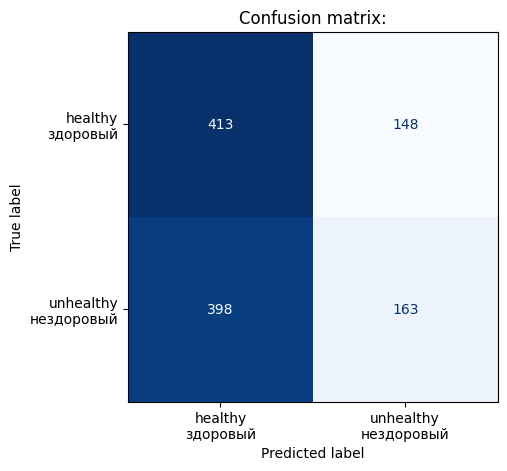

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|healthy/здоровый    |0.556    |0.558    |0.554    |
|unhealthy/нездоровый|0.553    |0.551    |0.555    |
----------------------------------------------------
Weighted average Precision : 0.554                 |
----------------------------------------------------
Weighted average Recall : 0.554                    |
----------------------------------------------------
Weighted average F1 : 0.554                        |
----------------------------------------------------
Accuracy : 0.554                                   |
----------------------------------------------------

Confusion matrix:
[[313 248]
 [252 309]]


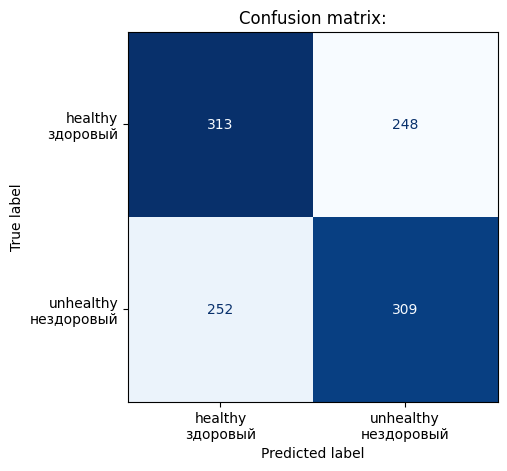

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|healthy/здоровый    |0.430    |0.378    |0.500    |
|unhealthy/нездоровый|0.554    |0.622    |0.500    |
----------------------------------------------------
Weighted average Precision : 0.500                 |
----------------------------------------------------
Weighted average Recall : 0.500                    |
----------------------------------------------------
Weighted average F1 : 0.492                        |
----------------------------------------------------
Accuracy : 0.500                                   |
----------------------------------------------------

Confusion matrix:
[[212 349]
 [212 349]]


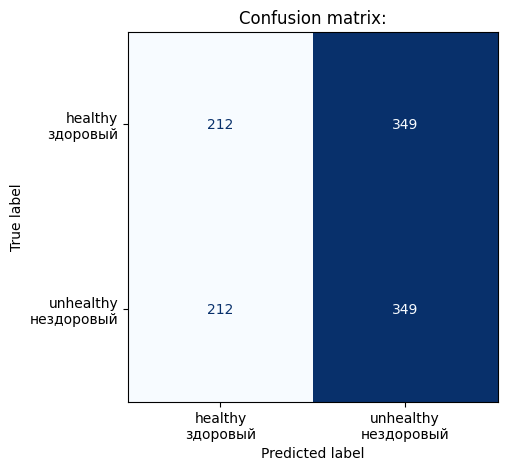

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|healthy/здоровый    |0.552    |0.560    |0.544    |
|unhealthy/нездоровый|0.539    |0.531    |0.547    |
----------------------------------------------------
Weighted average Precision : 0.545                 |
----------------------------------------------------
Weighted average Recall : 0.545                    |
----------------------------------------------------
Weighted average F1 : 0.545                        |
----------------------------------------------------
Accuracy : 0.545                                   |
----------------------------------------------------

Confusion matrix:
[[314 247]
 [263 298]]


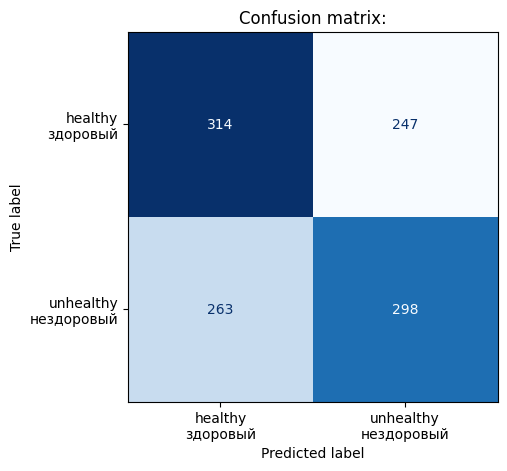

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|healthy/здоровый    |0.603    |0.747    |0.505    |
|unhealthy/нездоровый|0.354    |0.269    |0.515    |
----------------------------------------------------
Weighted average Precision : 0.510                 |
----------------------------------------------------
Weighted average Recall : 0.508                    |
----------------------------------------------------
Weighted average F1 : 0.478                        |
----------------------------------------------------
Accuracy : 0.508                                   |
----------------------------------------------------

Confusion matrix:
[[419 142]
 [410 151]]


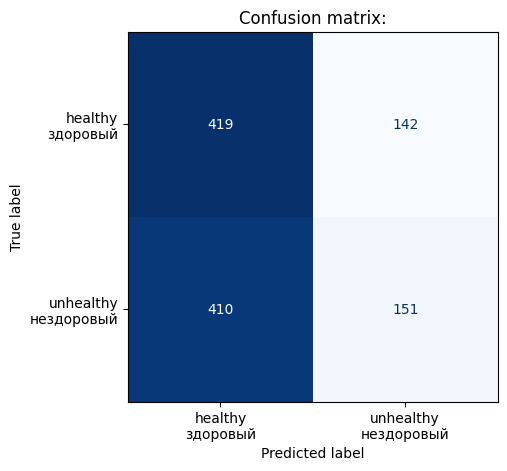

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|healthy/здоровый    |0.539    |0.545    |0.533    |
|unhealthy/нездоровый|0.528    |0.522    |0.535    |
----------------------------------------------------
Weighted average Precision : 0.534                 |
----------------------------------------------------
Weighted average Recall : 0.534                    |
----------------------------------------------------
Weighted average F1 : 0.534                        |
----------------------------------------------------
Accuracy : 0.534                                   |
----------------------------------------------------

Confusion matrix:
[[306 255]
 [268 293]]


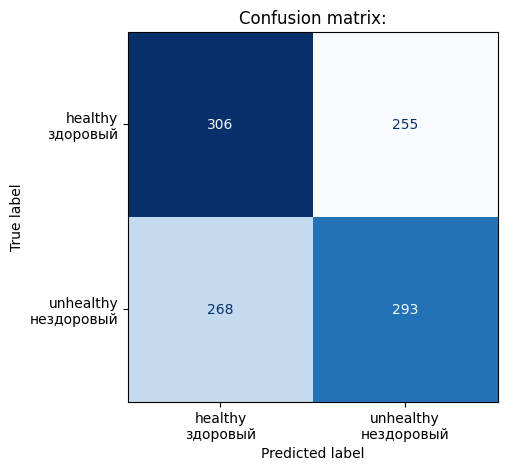

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|healthy/здоровый    |0.483    |0.481    |0.486    |
|unhealthy/нездоровый|0.488    |0.490    |0.486    |
----------------------------------------------------
Weighted average Precision : 0.486                 |
----------------------------------------------------
Weighted average Recall : 0.486                    |
----------------------------------------------------
Weighted average F1 : 0.486                        |
----------------------------------------------------
Accuracy : 0.486                                   |
----------------------------------------------------

Confusion matrix:
[[270 291]
 [286 275]]


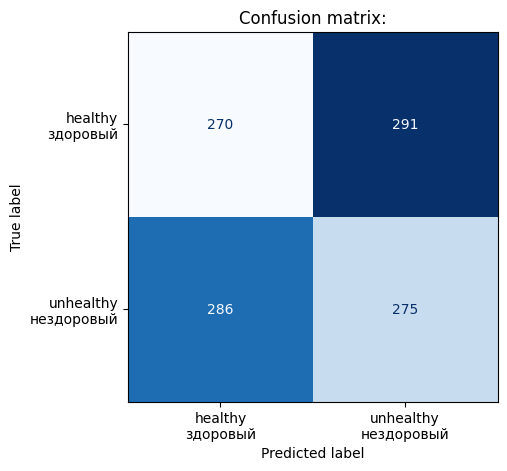

Neural Neutwork with 3 Layers-256:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|healthy/здоровый    |0.525    |0.540    |0.511    |
|unhealthy/нездоровый|0.497    |0.483    |0.512    |
----------------------------------------------------
Weighted average Precision : 0.512                 |
----------------------------------------------------
Weighted average Recall : 0.512                    |
----------------------------------------------------
Weighted average F1 : 0.511                        |
----------------------------------------------------
Accuracy : 0.512                                   |
----------------------------------------------------

Confusion matrix:
[[303 258]
 [290 271]]


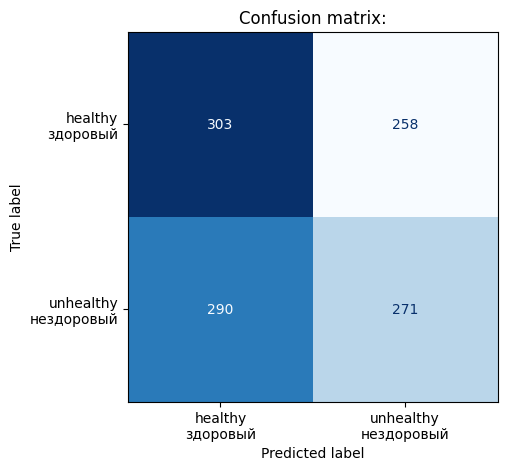

Neural Network with 1 Layer-256:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|healthy/здоровый    |0.530    |0.544    |0.517    |
|unhealthy/нездоровый|0.505    |0.492    |0.519    |
----------------------------------------------------
Weighted average Precision : 0.518                 |
----------------------------------------------------
Weighted average Recall : 0.518                    |
----------------------------------------------------
Weighted average F1 : 0.518                        |
----------------------------------------------------
Accuracy : 0.518                                   |
----------------------------------------------------

Confusion matrix:
[[305 256]
 [285 276]]


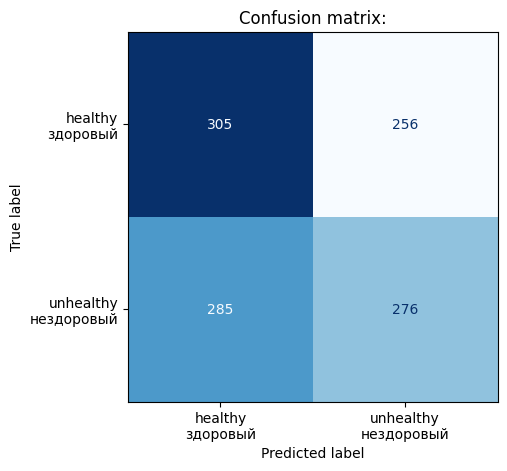

In [19]:
ml_train_eval(models, names, trainset_pca, y_train, valset_pca, y_val)

In [44]:
model = SVC(kernel='rbf')

clf = model
model_0 = clf.fit(X_train, y_train)

# Saving the best model

In [45]:
with open('/Users/anastasiiapovolotskaia/Desktop/AIOgramBot/sub_processes/model_svm_rbf.pickle', 'wb') as picklefile:
    pickle.dump(model_0, picklefile)

# Test the best model

In [46]:
with open('/Users/anastasiiapovolotskaia/Desktop/AIOgramBot/sub_processes/model_svm_rbf.pickle', 'rb') as picklefile:
    saved_model = pickle.load(picklefile)

SVM-rbf:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|healthy/здоровый    |0.526    |0.528    |0.524    |
|unhealthy/нездоровый|0.522    |0.520    |0.524    |
----------------------------------------------------
Weighted average Precision : 0.524                 |
----------------------------------------------------
Weighted average Recall : 0.524                    |
----------------------------------------------------
Weighted average F1 : 0.524                        |
----------------------------------------------------
Accuracy : 0.524                                   |
----------------------------------------------------

Confusion matrix:
[[296 265]
 [269 292]]


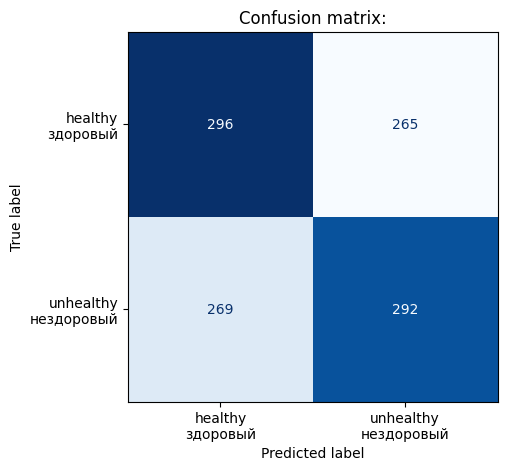

In [47]:
ml_test(model,
        'SVM-rbf',
        X_test,
        y_test)